<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/TF2_0_Regression_MooresLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/moore.csv
data = pd.read_csv('moore.csv', header=None).values

--2020-12-06 12:54:03--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-12-06 12:54:03 (61.3 MB/s) - ‘moore.csv’ saved [2302/2302]



# Data Pre-Processing

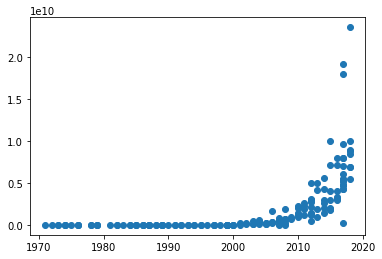

In [3]:
X = data[:,0]
y = data[:,1]
plt.scatter(X,y)

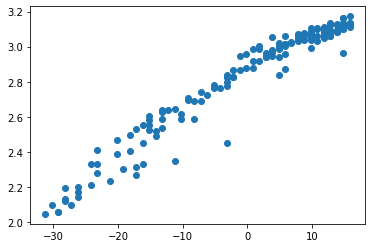

In [5]:
X = X - X.mean()
y = np.log(y)
plt.scatter(X,y)

# Data Modeling

In [7]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(
        1,
        input_shape=(1,)
    )
)

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse'
)

# model.compile(
#     optimizer='adam', 
#     loss='mse'
# )


# learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
log = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 12.9128
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 12.9138
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 14.0739
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 13.1939
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 7.8391
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 4.3337
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 3.2754
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 2.5919
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 2.3107
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 2.1658
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 1.7467
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 1.6046
Epoch 13/200
6/6 [==============================] - 0s 2m

# Model Evaluation

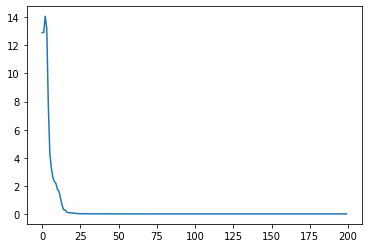

In [16]:
plt.plot(log.history['loss'],label='loss')

## From Model

In [40]:
print("Number of Layer : ", len(model.layers))
print("Weights : ", model.layers[0].get_weights())
m = model.layers[0].get_weights()[0][0][0]
print("Slope : ", m)

Number of Layer :  1
Weights :  [array([[0.02223067]], dtype=float32), array([2.8331988], dtype=float32)]
Slope :  0.022230668


## From Data Sample

In [47]:
X_raw = np.array(X)
Y_raw = np.array(y)
base = X_raw.dot(X_raw) - X_raw.mean() * X_raw.sum()
m = (X_raw.dot(Y_raw) - Y_raw.mean()*X.sum() )/ base
c = (Y_raw.mean() * X_raw.dot(X_raw) - X_raw.mean() * X_raw.dot(Y_raw))/base
print("Slope : ", m)

Slope :  0.02243874006912977


# Predictions

In [51]:
Yhat = model.predict(X).flatten()

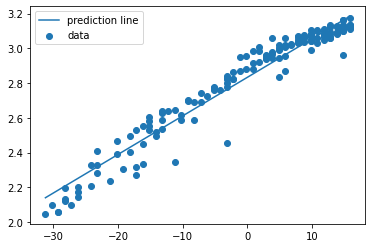

In [58]:
plt.scatter(X,y, label='data')
plt.plot(X, Yhat, label='prediction line')
plt.legend()

# Validate Weights 

In [67]:
w, b = model.layers[0].get_weights()
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True